https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb

```
# Descriptive statistics for just text-based variables
youtube_df.describe(include=['O'])

# Descriptive statistics for all variables
youtube_df.describe(include= 'all')
```

```
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(youtube_df["Subscribers"])
plt.title("histogram of subscribers")

plt.subplot(3, 3, 2)
plt.hist(youtube_df["Video Uploads"])
plt.title("histogram of video uploads")

plt.subplot(3, 3, 3)
plt.hist(youtube_df["Video views"])
plt.title("histogram of video views")

# Histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(youtube_df["winsorized_subscribers"])
plt.title("histogram of subscribers (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(youtube_df["winsorized_uploads"])
plt.title("histogram of video uploads (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(youtube_df["winsorized_views"])
plt.title("histogram of video views (winsorized)")

# Histograms of the log-transformed data
plt.subplot(3, 3, 7)
plt.hist(np.log(youtube_df["Subscribers"]))
plt.title("histogram of subscribers (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(youtube_df["Video Uploads"]))
plt.title("histogram of video uploads (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("histogram of video views (log transformed)")


plt.show()
```

Horizontal Bar Chart
```
# Bar chart of grades
plt.figure(figsize=(15,5))
plt.barh(youtube_df.groupby("Grade")["Grade"].count().index, 
        youtube_df.groupby("Grade")["Grade"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of grades")

plt.show()
```

Cool Visualization for Text

```
!pip install wordcloud

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(youtube_df["Channel name"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
```

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

educ_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [ ]:
educ2_df = educ_df.copy()

In [ ]:
# Use interpolation for missing values
# loc is like "find this row and then this column"

columns = educ2_df.columns[2:]

for column in columns:
    educ2_df.loc[:, column] = educ2_df.loc[:, column].interpolate()

In [ ]:
columns = educ2_df.columns[2:]
states = educ2_df["STATE"].unique()

for state in states:
    educ2_df.loc[educ2_df["STATE"] == state, columns] = educ2_df.loc[educ2_df["STATE"] == state, columns].interpolate()

# we drop the null values after interpolation
educ2_df.dropna(inplace=True)

Which of these is the histogram of the AVG_MATH_8_SCORE from the US education dataset where the null values have been dropped?

In [ ]:
# drop missing values in AVG_MATH_8_SCORE
educ3_df = educ_df.copy()
educ3_df.dropna(subset=['AVG_MATH_8_SCORE'])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


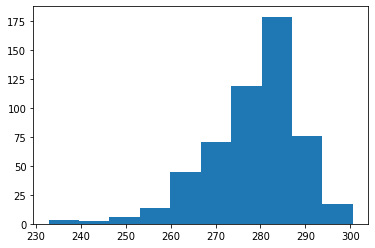

In [ ]:
# With missing values
plt.hist(educ_df['AVG_MATH_8_SCORE'])
plt.show()

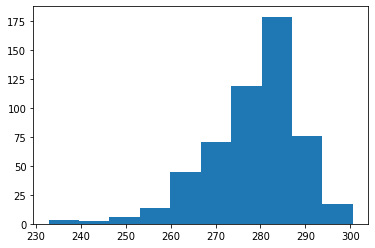

In [ ]:
# Without missing values
plt.hist(educ3_df['AVG_MATH_8_SCORE'])
plt.show()

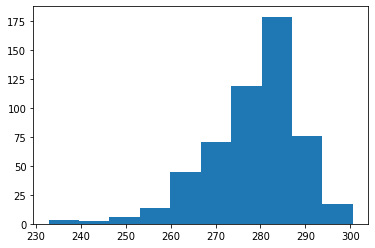

In [ ]:
#Notebook soln: supposed to be without missing values??
plt.hist(educ_df.AVG_MATH_8_SCORE.dropna())
plt.show()

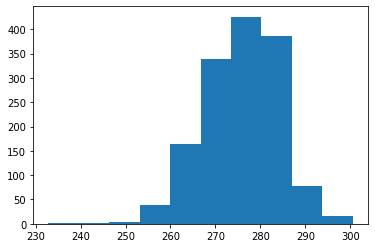

In [ ]:
# should be without missing values, but is interpolated, subset state
plt.hist(educ2_df['AVG_MATH_8_SCORE'])
plt.show()

I will use the clean dataframe, `educ2_df` for the rest of analysis

1.  Derive the descriptive statistics of the data and discuss the points you find remarkable.
---
> Average TOTAL_REVENUE is less than TOTAL_EXPENDITURE. This means that states run budget deficit on education on average.

> INSTRUCTION_EXPENDITURE makes up almost half of the total expenditures on education.

> Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores.

In [ ]:
round(educ2_df.mean())

YEAR                                2005.0
ENROLL                           1005984.0
TOTAL_REVENUE                   11267507.0
FEDERAL_REVENUE                   906639.0
STATE_REVENUE                    4979950.0
LOCAL_REVENUE                    5380917.0
TOTAL_EXPENDITURE               11298460.0
INSTRUCTION_EXPENDITURE          5871507.0
SUPPORT_SERVICES_EXPENDITURE     3370642.0
OTHER_EXPENDITURE                 500429.0
CAPITAL_OUTLAY_EXPENDITURE       1049006.0
GRADES_PK_G                        16091.0
GRADES_KG_G                        58815.0
GRADES_4_G                         59623.0
GRADES_8_G                         59443.0
GRADES_12_G                        50252.0
GRADES_1_8_G                      479693.0
GRADES_9_12_G                     228654.0
GRADES_ALL_G                      747263.0
AVG_MATH_4_SCORE                     233.0
AVG_MATH_8_SCORE                     276.0
AVG_READING_4_SCORE                  219.0
AVG_READING_8_SCORE                  263.0
dtype: floa

In [ ]:
print(educ2_df['TOTAL_EXPENDITURE'].mean())
print(educ2_df['TOTAL_REVENUE'].mean())

11298460.165865384
11267507.149038462


In [ ]:
print(educ2_df['INSTRUCTION_EXPENDITURE'].mean() / educ2_df['TOTAL_EXPENDITURE'].mean())

0.5196732257483601

In [ ]:
round(educ2_df.describe())

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0,1456.0
mean,2005.0,1005984.0,11267507.0,906639.0,4979950.0,5380917.0,11298460.0,5871507.0,3370642.0,500429.0,1049006.0,16091.0,58815.0,59623.0,59443.0,50252.0,479693.0,228654.0,747263.0,233.0,276.0,219.0,263.0
std,7.0,1009158.0,12075729.0,1114991.0,5453728.0,5939856.0,12199237.0,6415787.0,3520831.0,525384.0,1282479.0,28936.0,78272.0,78482.0,77361.0,66653.0,629457.0,301670.0,930870.0,9.0,9.0,6.0,5.0
min,1992.0,43866.0,465650.0,31714.0,0.0,23917.0,481665.0,265549.0,139963.0,11541.0,12708.0,0.0,544.0,633.0,437.0,311.0,4878.0,1808.0,7254.0,187.0,233.0,182.0,236.0
25%,1999.0,297400.0,2598676.0,225084.0,1382799.0,965292.0,2577423.0,1365708.0,781090.0,127962.0,224585.0,1547.0,9862.0,10053.0,10088.0,8816.0,80424.0,39105.0,171010.0,227.0,270.0,216.0,260.0
50%,2005.0,754084.0,6575628.0,530869.0,3196920.0,2742262.0,6650688.0,3427804.0,1965748.0,341581.0,663245.0,5953.0,38377.0,38145.0,38060.0,33212.0,308068.0,146629.0,458562.0,234.0,276.0,220.0,263.0
75%,2011.0,1595024.0,18536201.0,1447408.0,8288798.0,8838075.0,18597784.0,9406610.0,5682262.0,849084.0,1775732.0,19810.0,70679.0,72258.0,72515.0,65309.0,577139.0,284350.0,886095.0,240.0,283.0,223.0,267.0
max,2017.0,6307022.0,89217262.0,9990221.0,50904567.0,36105265.0,85320133.0,43964520.0,26058021.0,3995951.0,10223657.0,250911.0,530531.0,493415.0,500143.0,498403.0,3929869.0,2013687.0,5944746.0,253.0,301.0,237.0,280.0


In [ ]:
educ2_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1456,1456
unique,1451,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,28


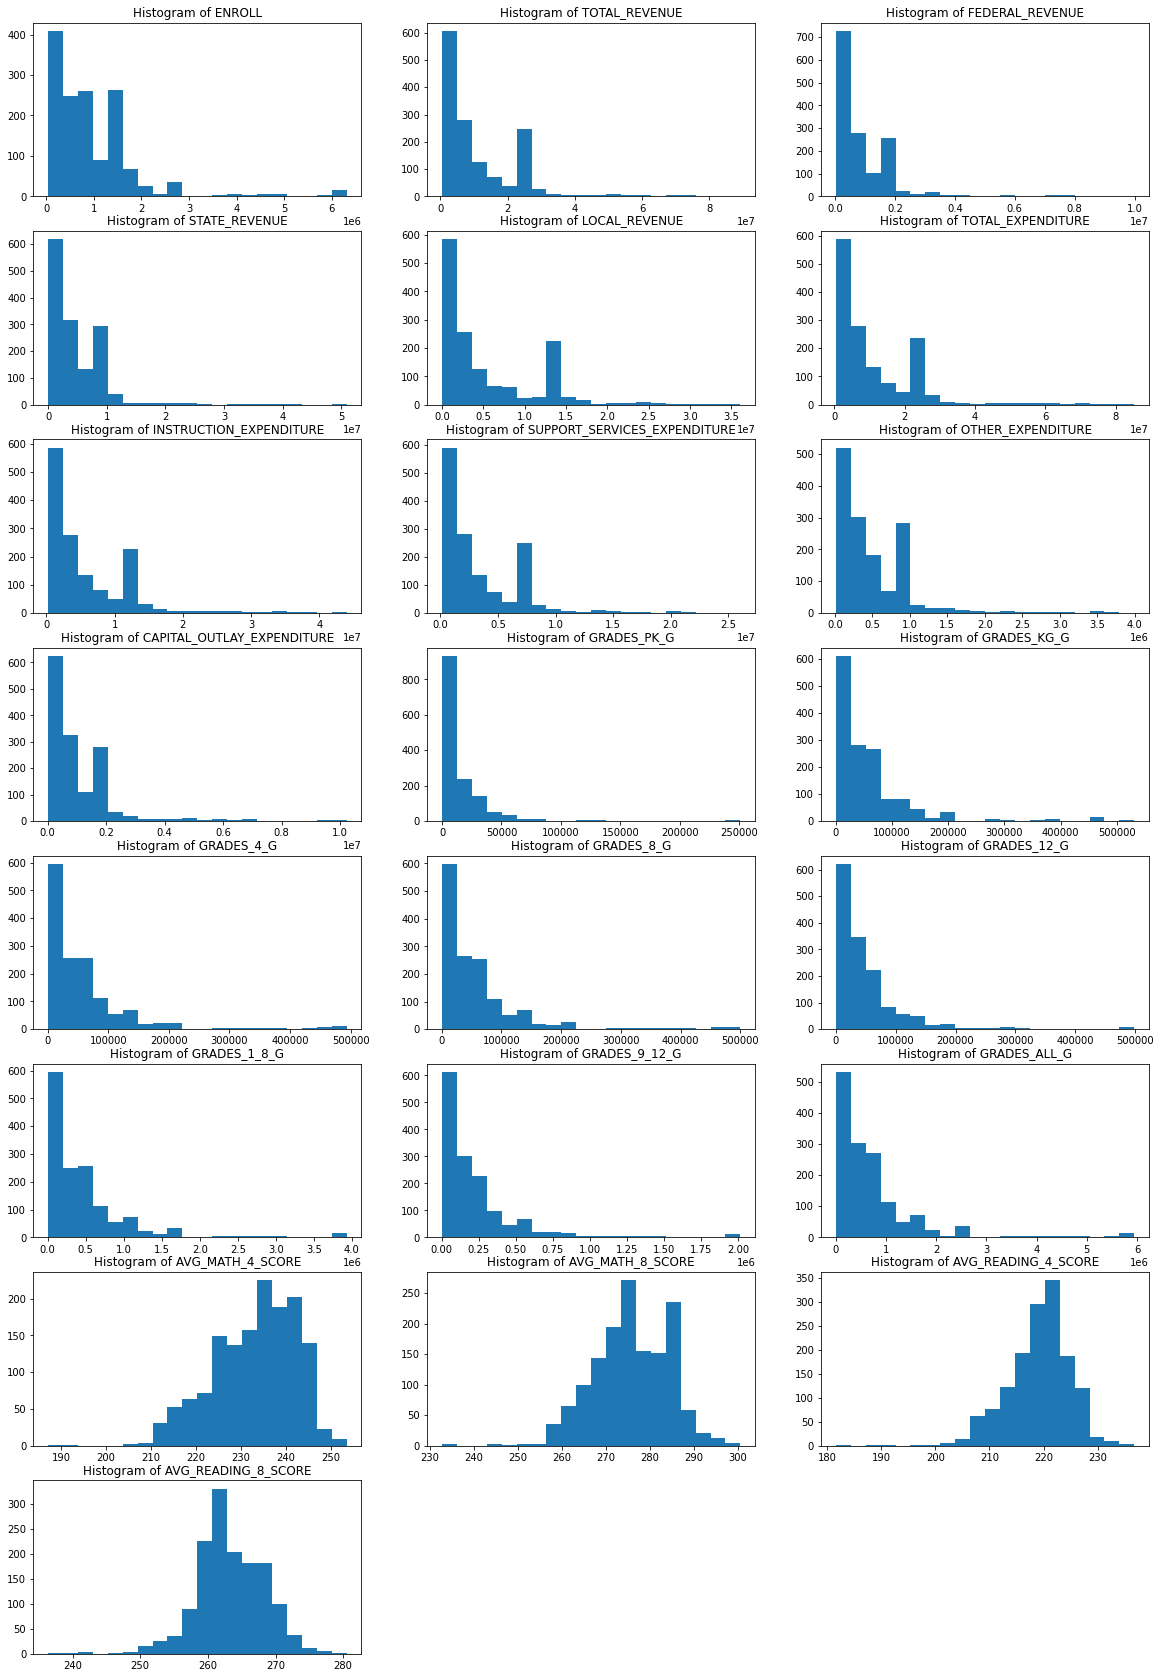

In [ ]:
plt.figure(figsize=(20,30))
for i in range(len(columns)-1):
    plt.subplot(8, 3, i+1)
    plt.hist(educ2_df[columns[i+1]], bins=20)
    plt.title("Histogram of " + columns[i+1])

2.  Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
---
> In Colorado, `TOTAL_EXPENDITURE` and `TOTAL_REVENUE` both doubled from 2016 to 2017. 2016 was an important election year, which may be the reason for the generous increse in spending and saving. 



In [ ]:
educ2_df['STATE'].unique

<bound method Series.unique of 36            WYOMING
37           OKLAHOMA
38             OREGON
39       PENNSYLVANIA
40       RHODE_ISLAND
            ...      
1487         VIRGINIA
1488       WASHINGTON
1489    WEST_VIRGINIA
1490        WISCONSIN
1491          WYOMING
Name: STATE, Length: 1456, dtype: object>

In [ ]:
educ2_df[educ2_df['STATE'] == 'COLORADO']['TOTAL_EXPENDITURE']

In [ ]:
educ2_df[educ2_df['STATE'] == 'COLORADO']['YEAR']

57      1993
109     1994
162     1995
214     1996
265     1997
317     1998
368     1999
421     2000
473     2001
525     2002
577     2003
629     2004
681     2005
732     2006
785     2007
837     2008
892     2009
945     2010
998     2011
1049    2012
1102    2013
1153    2014
1204    2015
1255    2016
1452    2017
Name: YEAR, dtype: int64

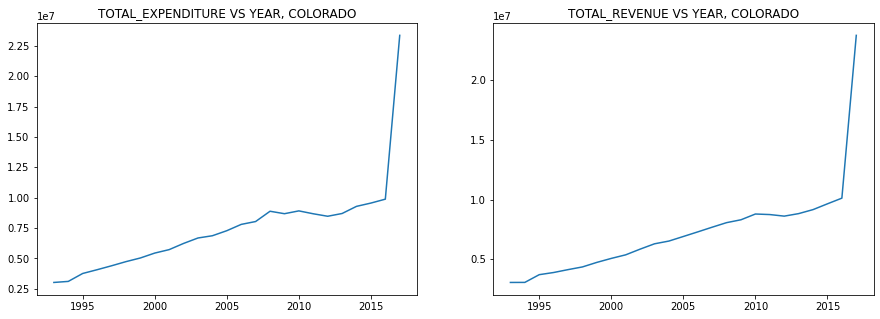

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(educ2_df[educ2_df['STATE'] == 'COLORADO']['YEAR'], educ2_df[educ2_df['STATE'] == 'COLORADO']['TOTAL_EXPENDITURE'])
plt.title('TOTAL_EXPENDITURE VS YEAR, COLORADO')

plt.subplot(1, 2, 2)
plt.plot(educ2_df[educ2_df['STATE'] == 'COLORADO']['YEAR'], educ2_df[educ2_df['STATE'] == 'COLORADO']['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE VS YEAR, COLORADO')

plt.show()

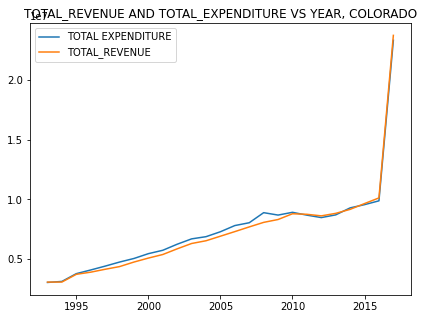

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(educ2_df[educ2_df['STATE'] == 'COLORADO']['YEAR'], educ2_df[educ2_df['STATE'] == 'COLORADO']['TOTAL_EXPENDITURE'])
#plt.title('TOTAL_EXPENDITURE VS YEAR, COLORADO')

plt.subplot(1, 2, 1)
plt.plot(educ2_df[educ2_df['STATE'] == 'COLORADO']['YEAR'], educ2_df[educ2_df['STATE'] == 'COLORADO']['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE AND TOTAL_EXPENDITURE VS YEAR, COLORADO')

plt.legend(['TOTAL EXPENDITURE', 'TOTAL_REVENUE'])

plt.show()

In [ ]:
educ2_df[educ2_df['STATE'] == 'COLORADO'][educ2_df['YEAR'] > 2014]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1204,2015_COLORADO,COLORADO,2015,872320.0,9648297.0,715254.0,4354525.0,4578518.0,9557682.0,4578938.0,3170482.0,397263.0,923360.0,32224.000000,64631.000000,68176.0,65957.000000,65317.000000,541348.000000,260909.000000,834481.000000,241.563576,285.539189,224.023225,258.986843
1255,2016_COLORADO,COLORADO,2016,880678.0,10123271.0,713914.0,4365019.0,5044338.0,9878524.0,4786838.0,3333043.0,399899.0,880204.0,742.351351,7670.243243,7401.0,6591.135135,5711.324324,57922.351351,24894.756757,83559.459459,246.454518,286.650184,227.966637,260.547157
1452,2017_COLORADO,COLORADO,2017,1595024.0,23766529.0,1680983.0,9277802.0,12807744.0,23352516.0,12247509.0,7357292.0,956321.0,1854842.0,270.000000,1006.000000,1212.0,1103.000000,1024.000000,9403.000000,5084.000000,446508.000000,240.695017,286.247718,224.691619,270.338689


In [ ]:
interestingexpenditure = educ2_df[educ2_df['STATE'] == 'COLORADO'][educ2_df['YEAR'] > 2010]['TOTAL_EXPENDITURE']

In [ ]:
interestingexpenditure.pct_change()

998          NaN
1049   -0.023502
1102    0.026744
1153    0.067536
1204    0.029188
1255    0.033569
1452    1.363968
Name: TOTAL_EXPENDITURE, dtype: float64

In [ ]:
interestingrevenue = educ2_df[educ2_df['STATE'] == 'COLORADO'][educ2_df['YEAR'] > 2010]['TOTAL_REVENUE']

In [ ]:
interestingrevenue.pct_change()

998          NaN
1049   -0.015029
1102    0.024473
1153    0.038013
1204    0.053031
1255    0.049229
1452    1.347712
Name: TOTAL_REVENUE, dtype: float64

3.  In your chosen state, in which of the lessons are the students more successful—math or reading?
---
> Students on average score better in math compared to reading in both 4th and 8th grade. 

In [ ]:
math_reading_columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
for col in math_reading_columns:       
  print(educ2_df[educ2_df['STATE']=='COLORADO'][col].describe())

count     25.000000
mean     235.390177
std        9.099510
min      215.731398
25%      225.988854
50%      239.272742
75%      241.563576
max      246.975708
Name: AVG_MATH_4_SCORE, dtype: float64
count     25.000000
mean     280.063470
std        7.374689
min      262.093629
25%      275.608214
50%      281.092907
75%      285.631004
max      291.742673
Name: AVG_MATH_8_SCORE, dtype: float64
count     25.000000
mean     221.925999
std        3.549289
min      213.371063
25%      220.453680
50%      222.498458
75%      224.023225
max      227.966637
Name: AVG_READING_4_SCORE, dtype: float64
count     25.000000
mean     262.532355
std        4.988545
min      251.936881
25%      259.564238
50%      261.197714
75%      266.228561
max      271.688113
Name: AVG_READING_8_SCORE, dtype: float64


In [ ]:
print("MATH 8 mean: {}".format(educ2_df[educ2_df['STATE']=='COLORADO']['AVG_MATH_8_SCORE'].mean()))
print("READING 8 mean: {}".format(educ2_df[educ2_df['STATE']=='COLORADO']['AVG_READING_8_SCORE'].mean()))
print("MATH 4 mean: {}".format(educ2_df[educ2_df['STATE']=='COLORADO']['AVG_MATH_4_SCORE'].mean()))
print("READING 4 mean: {}".format(educ2_df[educ2_df['STATE']=='COLORADO']['AVG_READING_4_SCORE'].mean()))

MATH 8 mean: 280.0634695798918
READING 8 mean: 262.53235458954697
MATH 4 mean: 235.39017734865362
READING 4 mean: 221.9259987488662


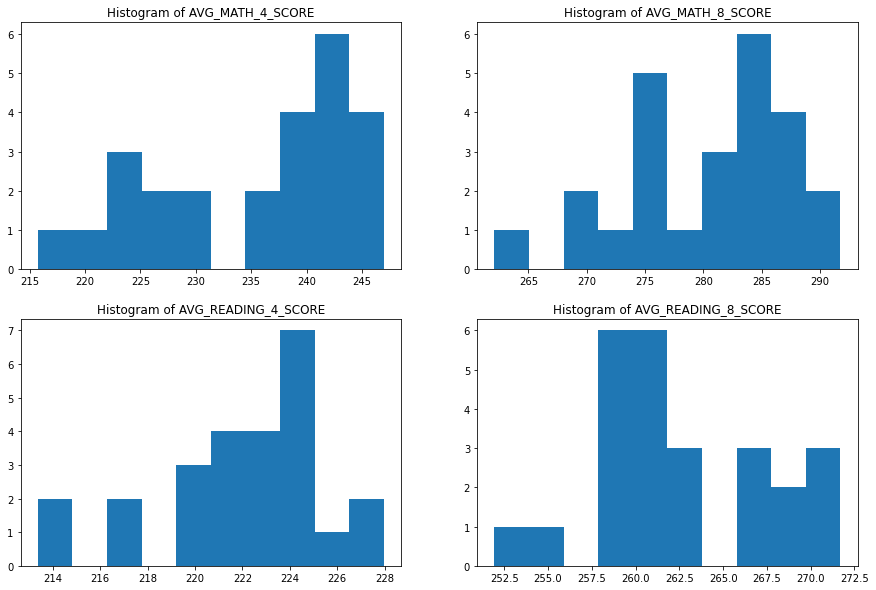

In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
  plt.subplot(2,2,i+1)       
  plt.hist(educ2_df[educ2_df['STATE']=='COLORADO'][math_reading_columns[i]], bins=10)
  plt.title("Histogram of " + math_reading_columns[i])


Solution:

Note to self, utilize `.loc` more frequently

```
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])
```

4.  What are the distributions of the math and reading scores in the sample?
---
> ans

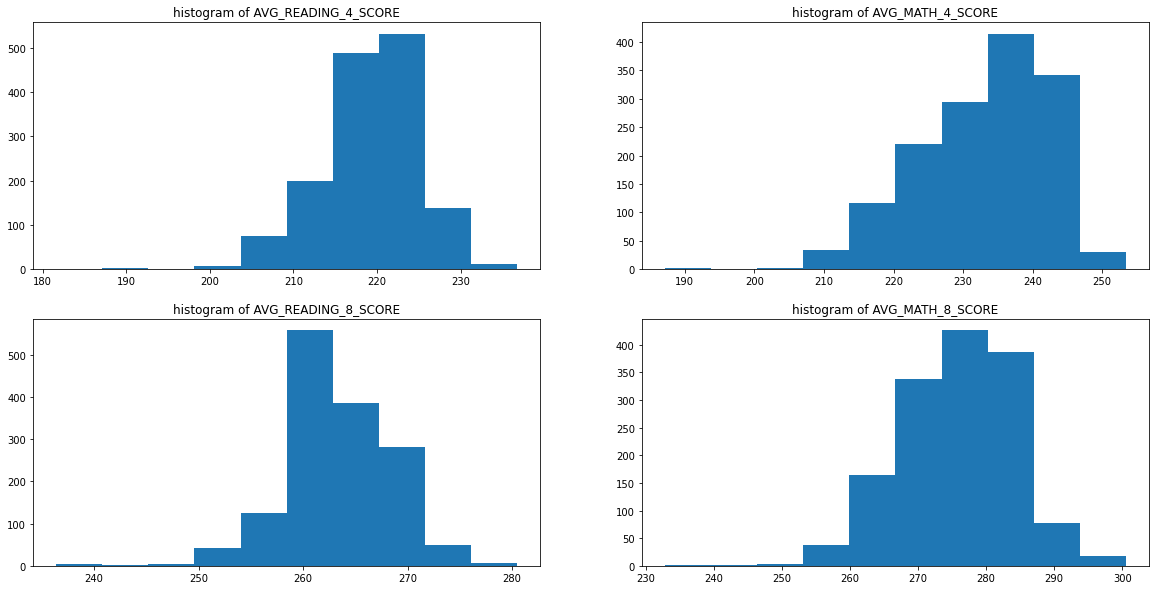

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(educ2_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(educ2_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(educ2_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(educ2_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

5.  Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.
---
> For mean and median techniques are much more centered around the middle.  With linear interpolation, you have more shape in the distribution. 


The technique for filling in the missing values substantially affects the distributions of the variables. Especially in our case, filling with mean or median has the strongest effect. This is probably due to the fact that we have a lot of missing values in our data.

The change in the distribution might have some serious effects on our model results. Hence, instead of filling in the missing values with mean or median, we may fill them in using interpolation or we may just discard the missing values.

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

educ_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

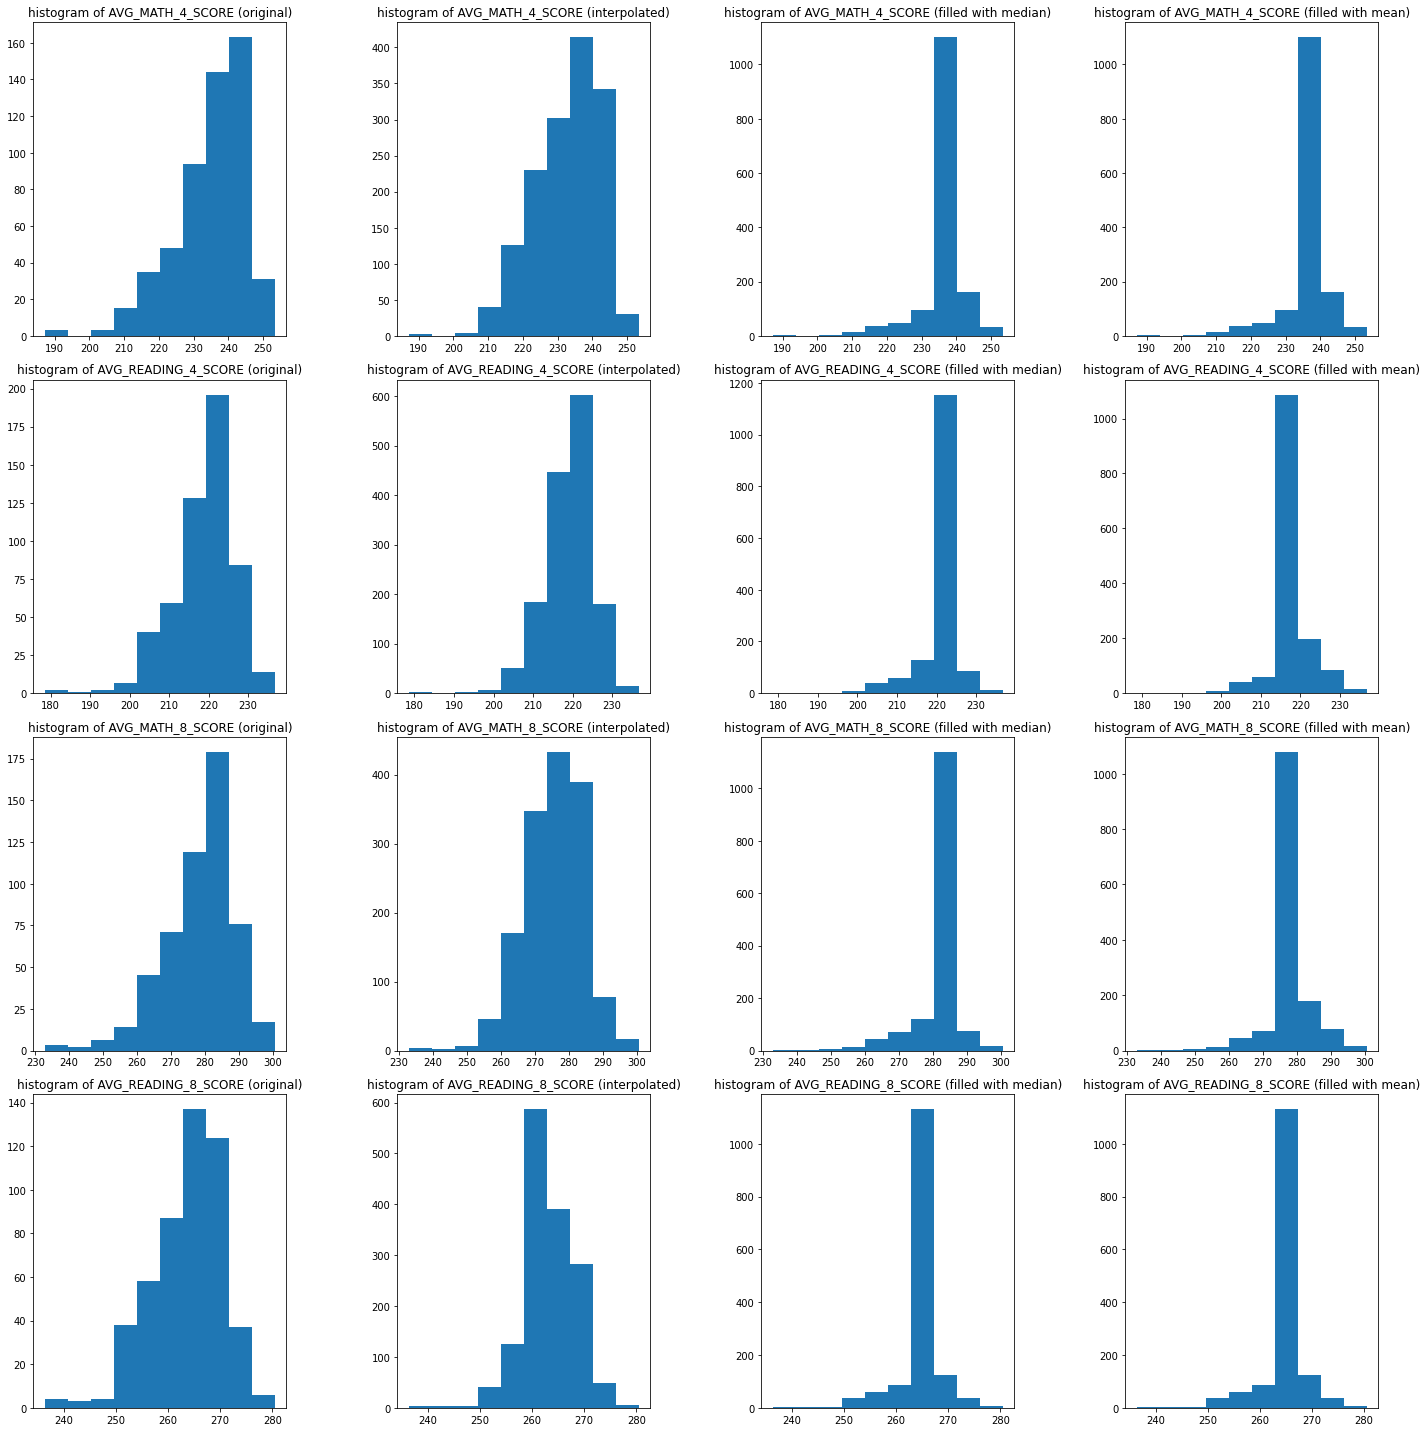

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(educ_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(educ_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(educ_df.AVG_MATH_4_SCORE.fillna(educ_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(educ_df.AVG_MATH_4_SCORE.fillna(educ_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(educ_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(educ_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(educ_df.AVG_READING_4_SCORE.fillna(educ_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(educ_df.AVG_READING_4_SCORE.fillna(educ_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(educ_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(educ_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(educ_df.AVG_MATH_8_SCORE.fillna(educ_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(educ_df.AVG_MATH_8_SCORE.fillna(educ_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(educ_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(educ_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(educ_df.AVG_READING_8_SCORE.fillna(educ_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(educ_df.AVG_READING_8_SCORE.fillna(educ_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()